## Graficador da Base de dados Reais e dos poços de classificação (Bacia do Parana)

In [72]:
####################PACOTES###########################
%matplotlib inline
import numpy as np
import pylab as py
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Latex
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import sys

#---------------------
sys.path.insert(0,'../modules')
from appynho import plotagem as plm
from appynho_2 import plotagem as plm2

#######################################################

# Banco de dados Real (BD)

In [106]:
DB= pd.read_csv("../inputs/Real/BD_converted.txt", sep='\s+' , skiprows=2, 
                names=('Rock', 'Code' ,'Depth' ,'RHOB', 'GR','SP','DT'))
df=pd.DataFrame(DB)
#df

In [93]:
#Checa se os codigos de rocha conferem com os nomes das rochas
df=DB
arenito=[]
calcilutito=[]
diamictito=[]
arenito=[]
siltito=[]
argilito=[]
marga=[]
diabasio=[]
basalto=[]
folhelho=[]
for i in range (len(df)):
    if df.Rock[i]=='arenito' and df.Code[i]!=49.0:
        #print([i])
        arenito.append(i)
    if df.Rock[i]=='calcilutito' and df.Code[i]!=6.0:
        #print([i])
        calcilutito.append(i)
    if df.Rock[i]=='diamictito' and df.Code[i]!=44.0:
        #print([i])
        diamictito.append(i)
    if df.Rock[i]=='siltito' and df.Code[i]!=54.0:
        #print([i])
        siltito.append(i)
    if df.Rock[i]=='argilito' and df.Code[i]!=56.0:
        #print([i])
        argilito.append(i)
    if df.Rock[i]=='marga' and df.Code[i]!=58.0:
        #print([i])
        marga.append(i)
    if df.Rock[i]=='diabasio' and df.Code[i]!=65.0:
        #print([i])
        diabasio.append(i)
    if df.Rock[i]=='basalto' and df.Code[i]!=66.0:
        #print([i])
        basalto.append(i)
    if df.Rock[i]=='folhelho' and df.Code[i]!=57.0:
        #print([i])
        folhelho.append(i)

# remocao das linhas com erro nos codigos de rocha;

df2=df.drop(arenito)#retira linha errônea
df2=df2.drop(siltito)
df2=df2.drop(calcilutito)
df2=df2.drop(diamictito)
df2=df2.drop(marga)
df2=df2.drop(diabasio)
df2=df2.drop(basalto)
df2=df2.drop(folhelho)
df2=df2.drop(argilito)

# SALVANDO O NOVO ARQUIVO A SER UTILIZADO NOS PROGRAMAS DE CLASSIFICACAO:
df2.to_csv('../inputs/Real/BD_converted2.txt',sep=' ', index=False)
 
    
#df.iloc[siltito]#Verfifica a linha DE UM DATAFRAME 

In [109]:
# Dado ja filtrado pelos codigos de rocha equivocados!

#df=df.drop([0])#retira cabeçalho

df=df.drop('Code',axis=1) #retira a coluna codigo
df=df.drop('Depth',axis=1) #retira a coluna prof
#df

In [104]:
#Cria o dicionário de cores do meu modelo baseado em moriak

# segundo método
#codigo={'#3fff00':'Shale',
#       '#ffff3f' :'Sandstone',
#       '#ff00ff' :'Diabase',
#       '#0eec5d' :'Diamictite',
#       '#4effff' :'Calcilutite',
#       '#2f0eff' :'Marl',
#       '#af1d4e' :'Siltite',
#       '#7eff00' :'Claystone'}

codigo = {#6:['#50ffff','Calciferous_mudstone'],
           # 8:['#0080ef','Calciferous_sandstone'],
            42:['#ffbf20','Conglomerate'],
            44:['#10ef60','Diamictite'],
            49:['#ffff40','Sandstone'],
            54:['#af2050','Siltstone'],
            56:['#80ff00','Mudstone'],
            57:['#40ff00','Shale'],
            58:['#3010ff','Marlstone'],
            65:['#ff00ff','Diabase'],
            66:['#f900f9','Basalt'],
            70:['#ff0000' ,'Metamorphic']}

cores = {#'#50ffff':'Calciferous_Mudstone',
            '#0080ef':'Calciferous_Sandstone',
            '#ffbf20':'Conglomerate',
            '#10ef60':'Diamictite',
            '#ffff40':'Sandstone',
            '#af2050':'Siltstone',
            '#80ff00':'Mudstone',
            '#40ff00':'Shale',
            '#3010ff':'Marlstone',
            '#ff00ff':'Diabase',
            '#f900f9':'Basalt',
            '#ff0000' :'Metamorphic'}

print(codigo.keys(),type(codigo))

dict_keys([42, 44, 49, 54, 56, 57, 58, 65, 66, 70]) <class 'dict'>


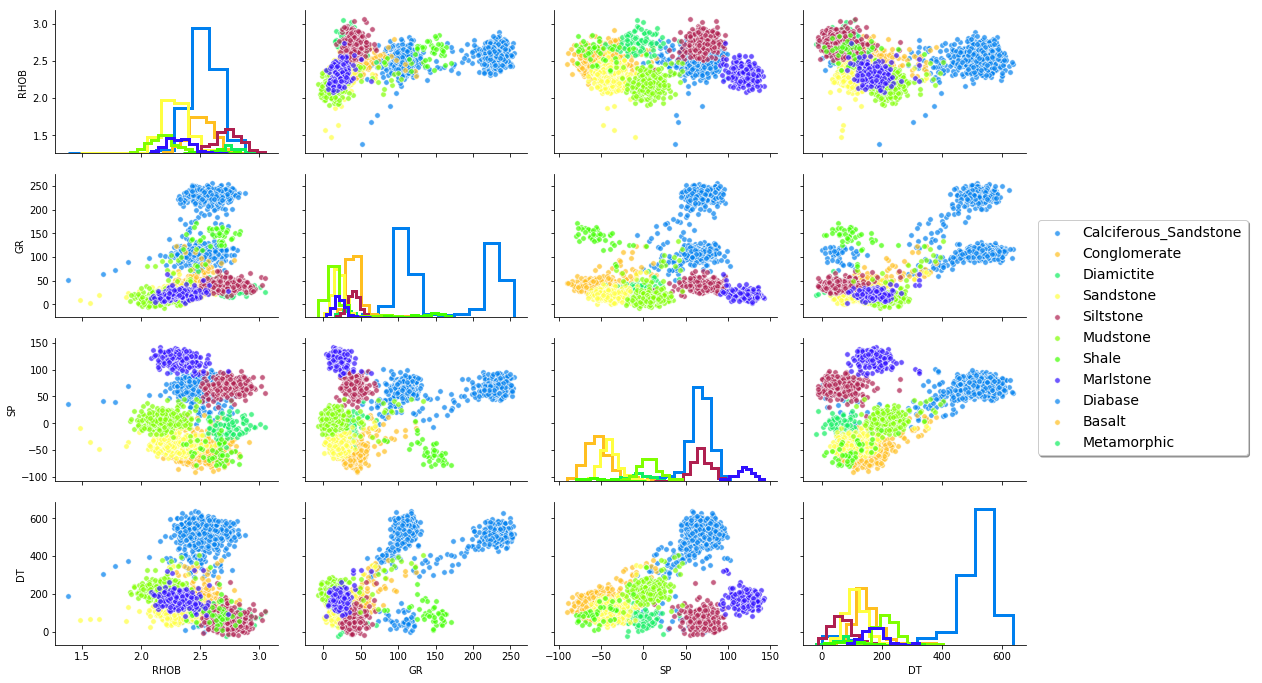

In [105]:
g = sns.PairGrid(df,hue='Rock',hue_order=None, palette=cores.keys(), height=2.4, aspect=1.5 )
#g = sns.PairGrid(df,hue='Rock', height=2.4, aspect=1.5 )
g.map_diag(plt.hist, histtype="step", linewidth=3) #ERROR
g.map_offdiag(sns.scatterplot, linewidths=1, edgecolor="w", s=30, alpha=0.7 )
g.fig.legend(labels=cores.values(), fontsize=14, loc='center right', bbox_to_anchor=(1.21, 0.5),
             fancybox=True, shadow=True, ncol=(1))

g.savefig('../images/BDreal120620a.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)

# Dispersão 1TP0003SC:

histtype : {'bar', 'barstacked', 'step', 'stepfilled'}, optional
The type of histogram to draw.

'bar' is a traditional bar-type histogram. If multiple data are given the bars are arranged side by side.
'barstacked' is a bar-type histogram where multiple data are stacked on top of each other.
'step' generates a lineplot that is by default unfilled.
'stepfilled' generates a lineplot that is by default filled.
Default is 'bar'

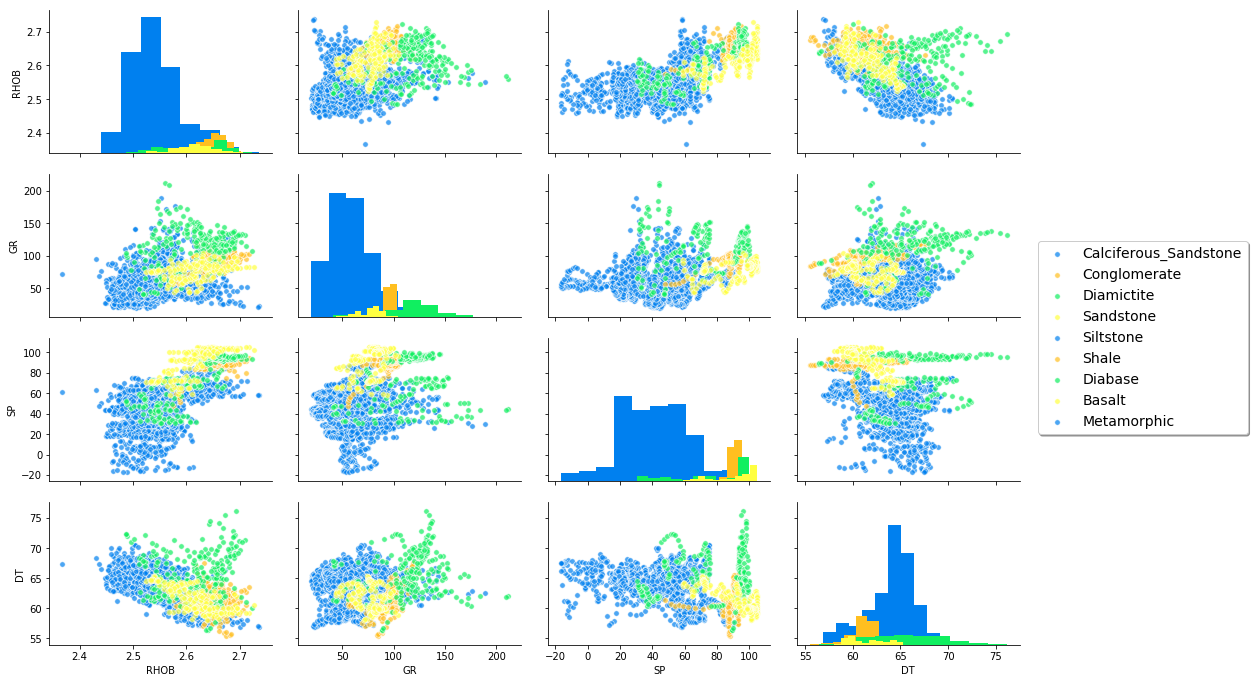

In [114]:
poco2 = pd.read_csv("../inputs/Real/1TP0003SC/perfis_1TP0003SC.txt", sep='\s+' , 
                 skiprows=2, names=('Rock', 'Code' ,'Depth' ,'RHOB', 'GR','SP','DT'))
dp=pd.DataFrame(poco2)

dp=dp.drop('Code',axis=1) #retira a coluna codigo
dp=dp.drop('Depth',axis=1) #retira a coluna prof

cores2 = {#'#50ffff':'Calciferous_Mudstone',
            '#0080ef':'Calciferous_Sandstone',
            '#ffbf20':'Conglomerate',
            '#10ef60':'Diamictite',
            '#ffff40':'Sandstone',
            '#af2050':'Siltstone',
           # '#80ff00':'Mudstone',
            '#40ff00':'Shale',
           # '#3010ff':'Marlstone',
            '#ff00ff':'Diabase',
            '#f900f9':'Basalt',
            '#ff0000' :'Metamorphic'}

g = sns.PairGrid(dp,hue='Rock',hue_order=None, palette=cores2.keys(), height=2.4, aspect=1.5 )
g.map_diag(plt.hist, histtype="barstacked", linewidth=3) #ERROR
g.map_offdiag(sns.scatterplot, linewidths=1, edgecolor="w", s=30, alpha=0.7 )
g.fig.legend(labels=cores2.values(), fontsize=14, loc='center right', bbox_to_anchor=(1.21, 0.5),
             fancybox=True, shadow=True, ncol=(1))

g.savefig('../images/1TP0003SC_120620a.pdf', dpi = 100, bbox_inches = 'tight', transparent = True)


### Dispersao poco AP10001 - Bacia do Parana:

In [7]:
c1 = pd.read_csv("../inputs/Real/classificacao1API0001.txt", sep='\s+' , 
                 skiprows=2, names=('Rock', 'Code' ,'Depth' ,'RHOB', 'GR','SP','DT'))

### Visualizando o dado

In [8]:
ap1=c1.drop('Code',axis=1) #retira a coluna codigo
ap1=ap1.drop('Depth',axis=1) #retira a coluna prof


## Definindo o codigo das rochas para paleta de cor:

codigo_C1={'#3fff00':'Shale',
       '#ffff3f' :'Sandstone'}

In [9]:
#ap1

,Rock,RHOB,GR,SP,DT
0,arenito,117.2,2.727,59.20000,53.5
1,arenito,114.0,2.714,59.00000,53.6
2,arenito,110.1,2.678,59.00000,53.8
3,arenito,103.2,2.616,58.80000,53.4
4,arenito,92.8,2.555,58.50000,53.8
5,arenito,84.5,2.526,58.90000,53.9
6,arenito,81.1,2.537,60.00000,53.7
7,arenito,77.8,2.536,61.00000,53.5
8,arenito,69.1,2.414,61.80000,54.0
9,arenito,56.9,2.156,62.00000,53.7


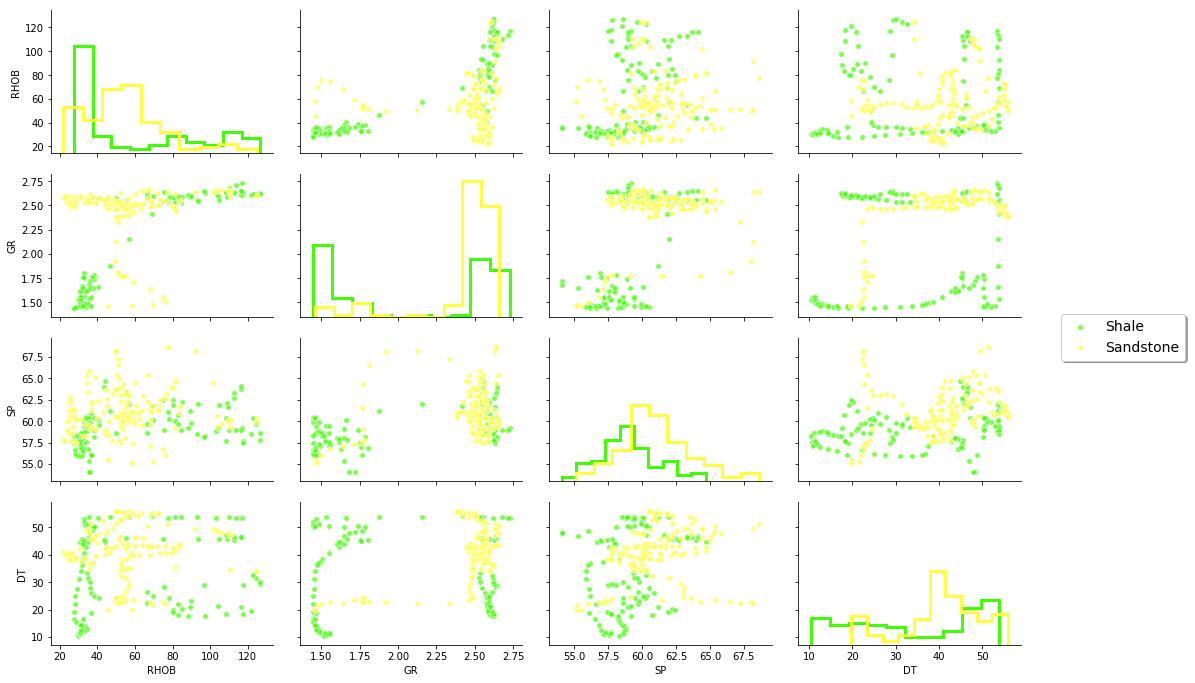

In [10]:
g = sns.PairGrid(ap1,hue='Rock',hue_order=None, palette=codigo_C1.keys(), height=2.4, aspect=1.5 )

g.map_diag(plt.hist, histtype="step", linewidth=3) #ERROR
g.map_offdiag(sns.scatterplot, linewidths=1, edgecolor="w", s=30, alpha=0.7 )
g.fig.legend(labels=codigo_C1.values(), fontsize=14, loc='center right', bbox_to_anchor=(1.15, 0.5),
             fancybox=True, shadow=True, ncol=(1))

g = g.savefig('../images/Ap1dispersion.pdf', dpi=300,  bbox_inches = 'tight', transparent = True)

## Dados de classificacao - POCO API00001:

In [3]:
# lê os dados de perfiliagem e rochas originais
poco = pd.read_csv("../inputs/Real/classificacao1API0001.txt", sep='\s+' , skiprows=2,
                   names=('Rock', 'Code' ,'Depth' ,'RHOB', 'GR','SP','DT'))

cod = np.array(poco.Code)
prof = np.array(poco.Depth)
RHOB = np.array(poco.RHOB)
GR = np.array(poco.GR)
SP = np.array(poco.SP)
DT = np.array(poco.DT)

In [4]:
## codigos de rochas encontradas em todas classificacoes e no poco real:
codigo1 = {57:['#3fff00','Shale'],
        49:['#ffff3f', 'Sandstone'],
        44:['#ff0004', 'Diamictite'],
        54:['#af1d4e', 'Siltite']}

# Leitura dos dados de classificacao para o poco real AP100001:

In [5]:
# Le os dados da classificacao Euclideana:
euclides = pd.read_csv('../outputs/Real/Eucli_1API0001.txt', 
                       sep='\s+' , names=('Depth' ,'Character', 'ClassEucli'))

ClassEuclides = np.array(euclides.ClassEucli)

In [6]:
#Lê os dados da classificação Mahalanobeana
maha = pd.read_csv('../outputs/Real/Maha_1API0001.txt', 
                   sep='\s+' , names=('Depth' ,'Character', 'ClassMaha'))

ClassMahalanobis = np.array(maha.ClassMaha)


In [7]:
#Lê os dados da classificação Kohoneana
koho = pd.read_csv('../outputs/Real/REAL_SOM_classificacao_norm_minmax.txt', 
                   sep='\s+', names=('Depth' ,'Character1', 'ClassKoho', 'Character2','Real','Character3'))

ClassKohonen = np.array(koho.ClassKoho)

koho

,Depth,Character1,ClassKoho,Character2,Real,Character3
0,1,classe=,57.0,=,49.0,--errado
1,2,classe=,57.0,=,49.0,--errado
2,3,classe=,57.0,=,49.0,--errado
3,4,classe=,49.0,=,49.0,--certo
4,5,classe=,49.0,=,49.0,--certo
5,6,classe=,49.0,=,49.0,--certo
6,7,classe=,49.0,=,49.0,--certo
7,8,classe=,57.0,=,49.0,--errado
8,9,classe=,57.0,=,49.0,--errado
9,10,classe=,57.0,=,49.0,--errado


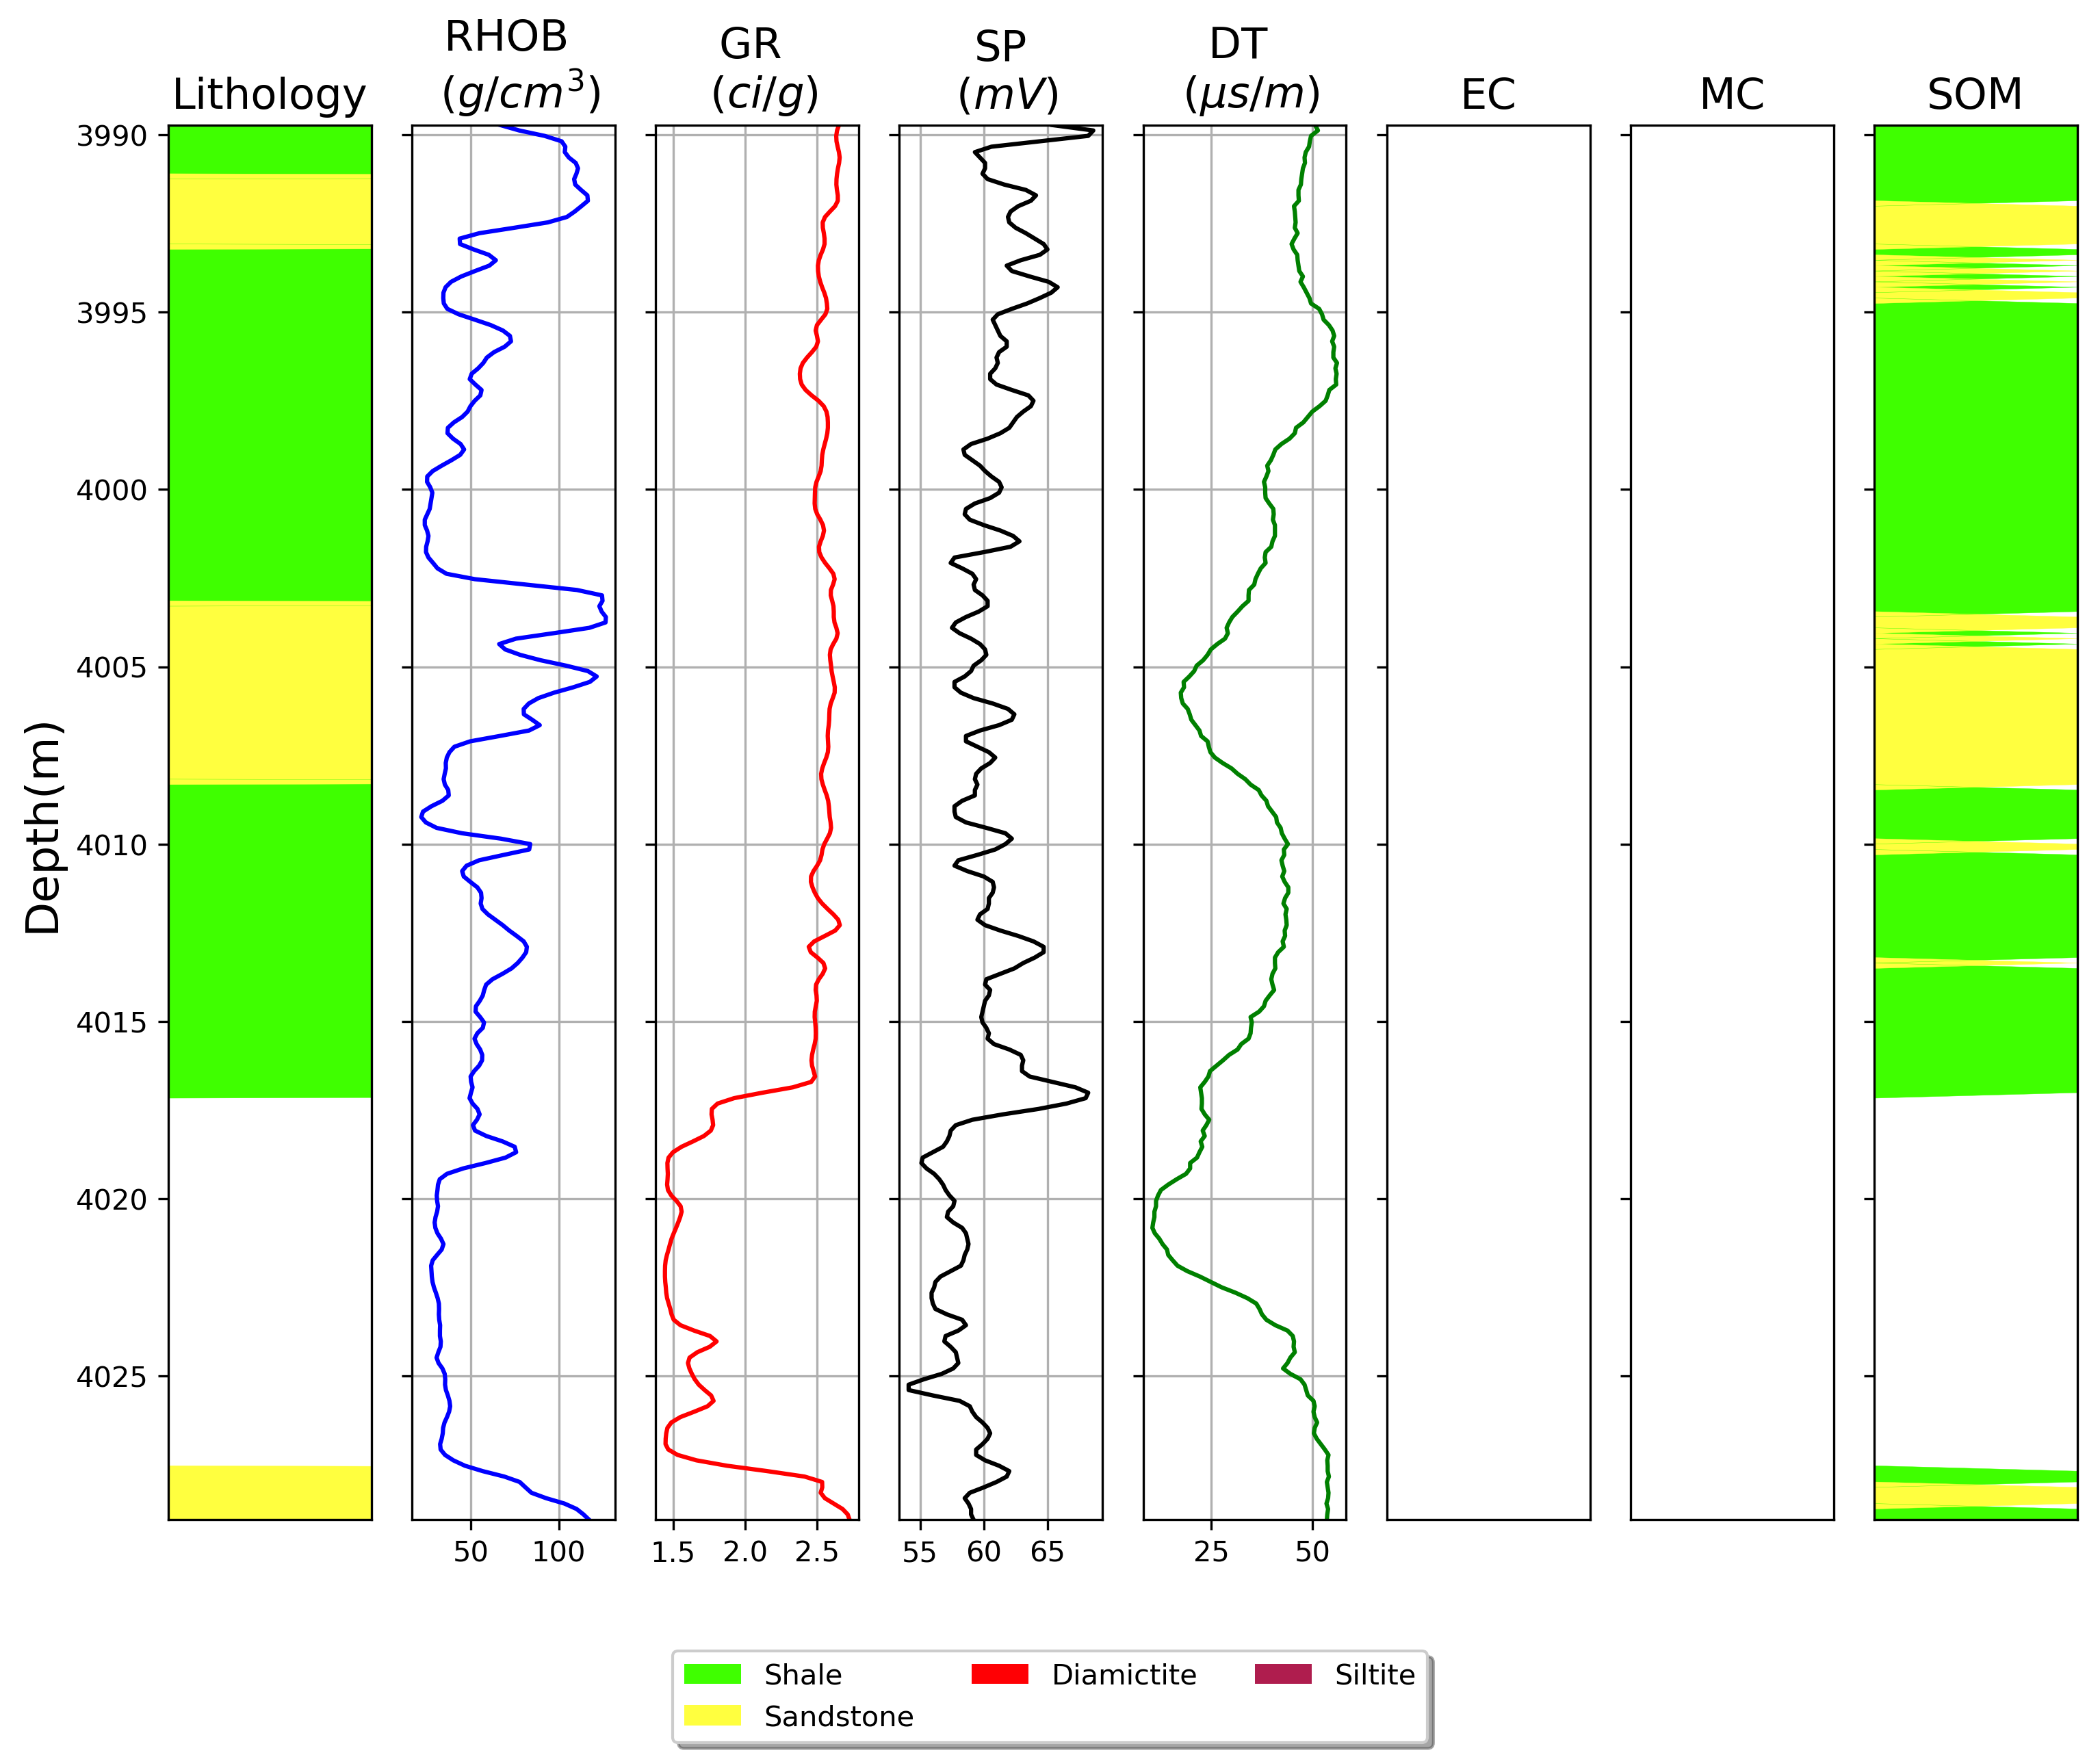

In [8]:
figure = plm(8,altura=9,comprimento=12,dpi=300)
figure.plot_l(0,cod,prof, codigo1, GR,minimo=1,maximo=1.1,titulo='Lithology', descricao_y='Depth(m)', legend=True)#0 é aprosição do track
figure.plot_s(1,RHOB,prof,cor='b',titulo='RHOB \n $(g/cm^{3})$',descricao_x='')
figure.plot_s(2,GR,prof,cor='r',titulo='GR \n $(ci/g$)',descricao_x='')
figure.plot_s(3,SP,prof,cor='k',titulo='SP\n $(mV)$',descricao_x='')
figure.plot_s(4,DT,prof,cor='g',titulo='DT \n $(\mu s/m)$',descricao_x='')
figure.plot_l(5,ClassEuclides,prof, codigo1, GR,minimo=1,maximo=2,titulo='EC')#0 é aprosição do track
figure.plot_l(6,ClassMahalanobis,prof, codigo1, GR,minimo=1,maximo=2,titulo='MC')
figure.plot_l(7,ClassKohonen,prof, codigo1, GR,minimo=1,maximo=2,titulo='SOM')

plt.savefig('../images/wellAp1.pdf', dpi=300, bbox_inches = 'tight', transparent = True) 

NameError: name 'plot_litho' is not defined

/home/victorcarreira/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


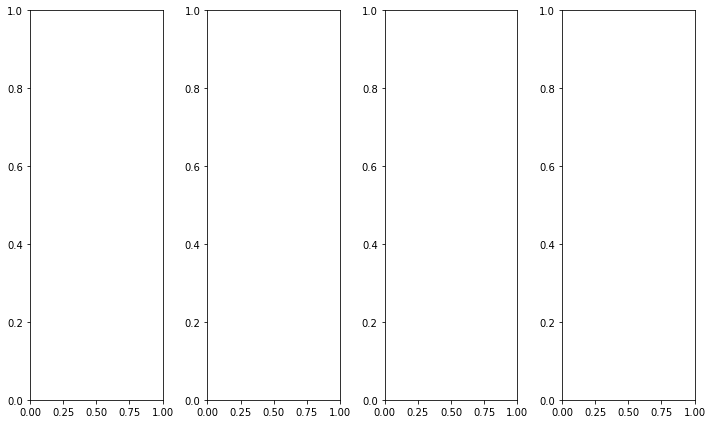

In [9]:
## Plota o perfil litologico com numero pequeno de dados:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 6), tight_layout=True)
codigo1 = {57:'#3fff00',49:'#ffff3f',
        44:'#ff0004', 54:'#af1d4e'}

objs1 = plot_litho(ax1,cod,prof,codigo1)
objs2 = plot_litho(ax2,ClassEuclides,prof,codigo1)
objs3 = plot_litho(ax3,ClassMahalanobis,prof,codigo1)
objs4 = plot_litho(ax4,ClassKohonen,prof,codigo1)

In [10]:
from matplotlib import transforms
def plot_litho(ax, litho, depth, colors, **kwargs):
    trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
    ul = np.unique(litho)
    objs = []
    for l in ul:
        where = litho == l
        obj = ax.fill_betweenx(depth, 0, 1, where=where, color=colors[l], transform=trans, **kwargs)
        objs.append(obj)
    return objs

# FIM